#### Importation des librairies 

In [32]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd

#### Téléchargement du jeu de données

In [33]:
data = pd.read_csv("wine_train.csv")
X_test = pd.read_csv("wine_test.csv")

#On sépare les covariables et variable à prédire 
X = data[data.columns[0:-1]]
y = data[["target"]]

#Division du jeu de données
from sklearn.model_selection import train_test_split
X_tr, X_te, y_tr, y_te = train_test_split(X,y, test_size=0.33, random_state=42)

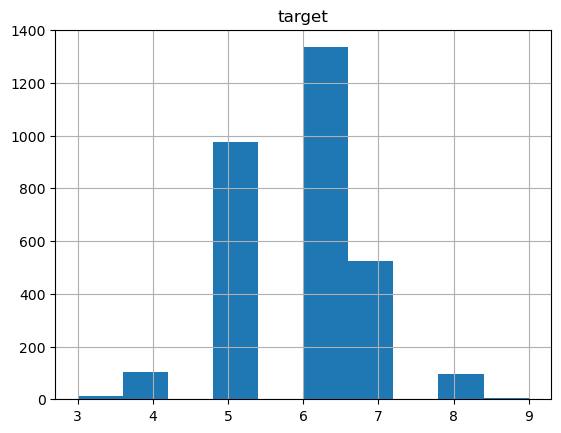

In [34]:
y_tr.hist()
plt.show()

On définit les fonctions dont on fera usage ultérieurement: 

In [35]:
def partie_entiere(vector):
    nv = vector.copy()
    for i in range(len(vector)): 
        nv[i] = np.int64(vector[i])
    return nv

def partie_decimale(vector): 
    nvector = vector.copy()
    for i in range(len(nvector)): 
        dec = vector[i] % 1
        if dec >= 0.5: 
            nvector[i] = np.int64(vector[i]) + 1
        else: nvector[i] = np.int64(vector[i])
    return nvector

from sklearn.preprocessing import StandardScaler

def train_eval(model, metric, X, y, X_test, y_test):
    lab = str(model()) 
    #Entrainement du modèle 
    stdsc = StandardScaler()
    X = stdsc.fit_transform(X)
    X_test = stdsc.transform(X_test)
    mod = model()
    mod.fit(X,y)
    pred = mod.predict(X_test)

    plt.figure()
    plt.hist(y_te, density=True, label="True", alpha=0.5, bins=np.linspace(3,9,7))
    plt.hist(pred, density=True, label=lab, alpha=0.5, bins=np.linspace(3,9,7))
    plt.title("Histogramme des predicitions de "+lab)
    plt.legend()
    plt.show()

    print("normal: ", metric(y_test, pred))

    pe = partie_entiere(pred);pde = partie_decimale(pred)

    print("entiere: ", metric(y_test,pe))
    print("dec: ", metric(y_test, pde))
    return pred

On constate que le modèle à du mal à prédire des classes situées aux extrêmités. Ceci pourrait être du à la répartition inégale des effectifs de chaque classe. On va ainsi essayer de créer des effectifs artificiels pour gerer ce déséquilibre. 

In [48]:
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression

Linear Regression

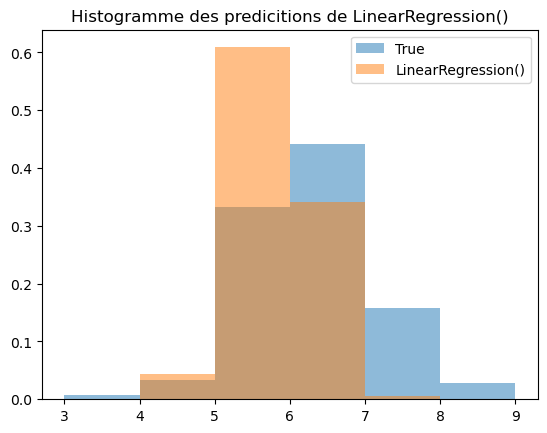

normal:  0.3036198342907078
entiere:  -0.10221546384886881
dec:  0.18451839190179153


In [49]:
plr = train_eval(LinearRegression, r2_score, X_tr, y_tr, X_te, y_te)

SVR

/opt/conda/envs/DataChallenge/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


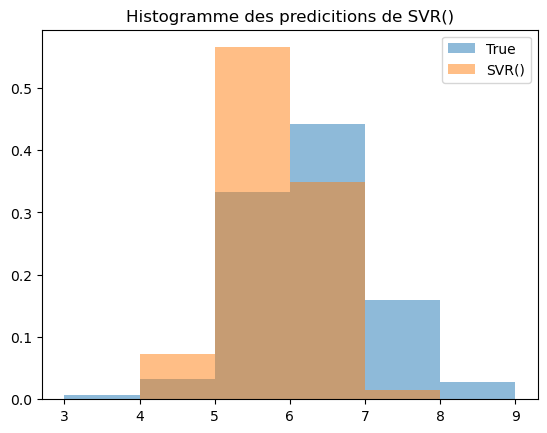

normal:  0.3706286544705034
entiere:  -0.07854019135569512
dec:  0.26168224299065423


In [50]:
from sklearn.svm import SVR

psvm = train_eval(SVR, r2_score, X_tr, y_tr, X_te, y_te)

In [28]:
data = pd.read_csv("wine_train.csv")
#On sépare les covariables et variable à prédire 
X = data[data.columns[0:-1]]
y = data[["target"]]
X_tr, X_te, y_tr, y_te = train_test_split(X,y, test_size=0.33, random_state=42)
X_test = pd.read_csv("wine_test.csv")

from sklearn.svm import SVR
#Entrainement du modèle 
stdsc = StandardScaler()
Xs = stdsc.fit_transform(Xs)
X_test = stdsc.transform(X_test)
mod = SVR()
mod.fit(X,y)
pred = mod.predict(X_test)

/opt/conda/envs/DataChallenge/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [31]:
X_test = pd.read_csv("wine_test.csv")

import numpy as np 
import csv

data = np.column_stack((X_test[["wine_ID"]].to_numpy(), pred))
    # Nommez les colonnes
column_names = ['wine_ID', 'target']
    # Spécifiez le nom du fichier CSV de sortie
csv_filename = 'submissions_R/'+'SVR'+'_'+'0710'+'.csv'
    # Ouvrez le fichier CSV en mode écriture et écrivez les données
with open(csv_filename, 'w', newline='') as csv_file:
    writer = csv.writer(csv_file)
        # Écrivez les noms des colonnes
    writer.writerow(column_names)
        # Écrivez les données
    writer.writerows(data)

LassoCV

/opt/conda/envs/DataChallenge/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


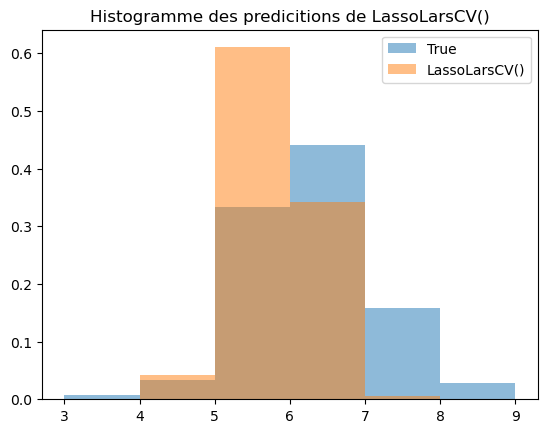

normal:  0.30356556184131056
entiere:  -0.10046173996048569
dec:  0.18714897773436645


In [51]:
from sklearn.linear_model import LassoLarsCV

pls = train_eval(LassoLarsCV, r2_score, X_tr, y_tr, X_te, y_te)

Ridge

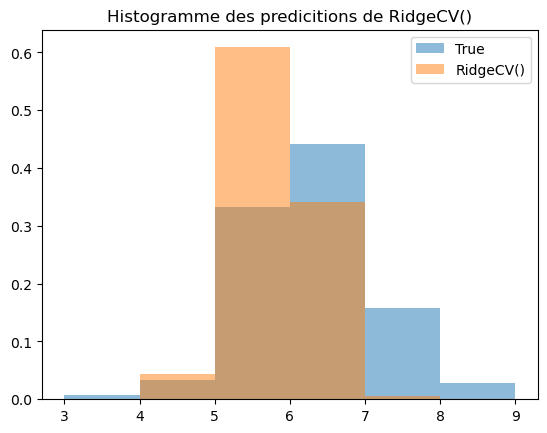

normal:  0.3040707735541991
entiere:  -0.09870801607210233
dec:  0.18802583967855802


In [52]:
from sklearn.linear_model import RidgeCV

plic = train_eval(RidgeCV, r2_score, X_tr, y_tr, X_te, y_te)

/tmp/ipykernel_18341/3984635148.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  mod.fit(X,y)


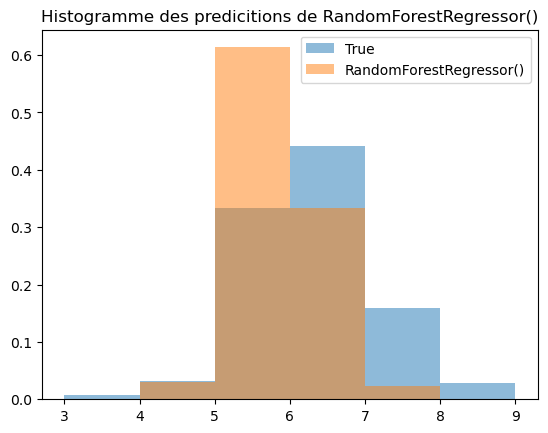

normal:  0.4219784813639088
entiere:  0.006515417230892329
dec:  0.3555064710191579


In [47]:
from sklearn.ensemble import RandomForestRegressor

plic = train_eval(RandomForestRegressor, r2_score, X_tr, y_tr, X_te, y_te)

On peut dans la suite: 
- créer une pipeline: (Standart scaler + regressions)
- Selection des paramètres par CV